In [217]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
import pandas as pd


In [218]:
samples= pd.read_csv('dataset/Dataset_clean_textblobvader12112023.csv', encoding='UTF-8')
# samples=samples[['likes','replies','quotes','retweets','searchQuery','clean_content']]
samples.shape

(5830, 17)

In [219]:
print("Jumlah Konten unik:",int(len(samples['clean_content'].unique())))
# samples['clean_content'].unique()

Jumlah Konten unik: 3940


In [220]:
samples.shape

(5830, 17)

In [221]:
samples.drop_duplicates(subset=['clean_content'], inplace=True)
# print(samples)

In [222]:
# print("Jumlah Konten unik:",int(len(samples['clean_content'])))
samples.shape

(3940, 17)

In [223]:
# len(samples['clean_content'].unique())
print("Jumlah Query unik:",int(len(samples['searchQuery'].unique())))
samples['searchQuery'].unique()

Jumlah Query unik: 23


array(['#gibran', '#cakimin', 'mahfud', 'gibran', '#mahfudmd', '#mahfud',
       '#muhaimin', 'cakimin', 'muhaimin', 'mahfudmd', 'anies', '#ganjar',
       'prabowo', '#prabowo', '#anies', 'ganjar', 'anies cakimin',
       'anies muhaimin', 'prabowo gibran', 'ganjar mahfudmd',
       'ganjar mahfud', '#mahfudmd #ganjar', '#cakimin #anies'],
      dtype=object)

## Define Date Timestamp

In [224]:
from datetime import datetime
now = datetime.now() # current date and time
d = now.strftime("%d%m%Y")
print(d)

20112023


## Setup Data Sampling

In [225]:
#get sampling data random
sample=samples.sample(n=500,replace=True,random_state=42)
#get sampling random 50% of data random 
# df = df.sample(n=3,replace=True,frac=0.5,random_state=42)

In [226]:
import numpy as np
# Code Snippet for Character Length Histogram
def plot_character_length_histogram(text):
    text.str.len().\
        hist()

# Code Snippet for Word Number Histogram
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

# Code Snippet for Word Length Histogram
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x: [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

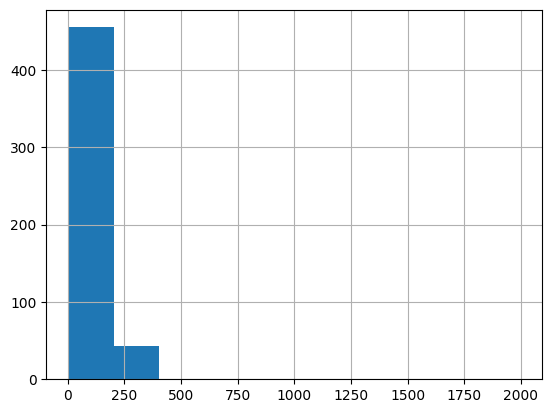

In [227]:
plot_character_length_histogram(sample['clean_content'])

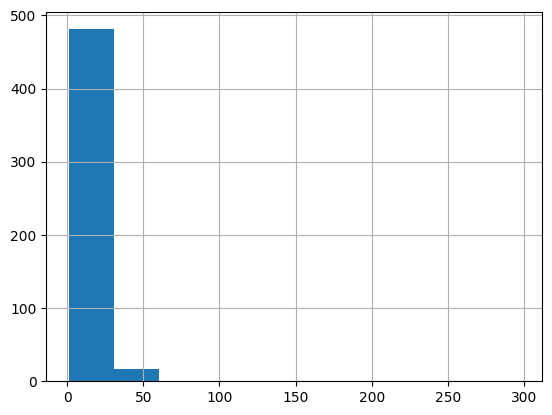

In [228]:
plot_word_number_histogram(sample['clean_content'])

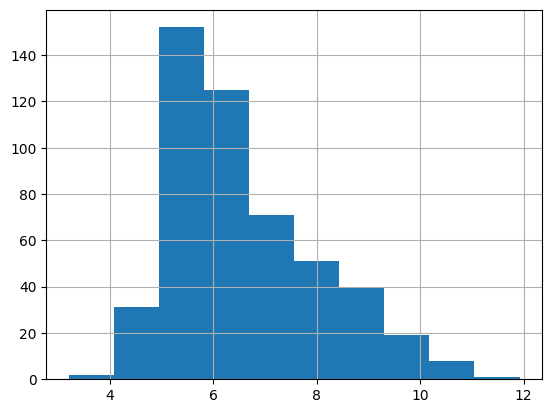

In [229]:
plot_word_length_histogram(sample['clean_content'])

## Split Dataset

In [230]:
sample.head()

likes  replies  quotes  retweets     searchQuery  \
3775      0        0       0         0          #anies   
4415      0        0       0         0  anies muhaimin   
971       1        1       0         0          mahfud   
1473     91        3       0        47        muhaimin   
1261      0        0       0         0       #mahfudmd   

                                          clean_content    tanggal       date  \
3775                semangka aminforfreepalestine anies  11/5/2023  11/5/2023   
4415  muhaimin support system pas banget anies they ...  11/7/2023  11/7/2023   
971   ganjar proses lapis maksuba sabar libat bahan ...  11/7/2023  11/7/2023   
1473  insyaallah allah rakyat dukung palestina dukun...  11/5/2023  11/5/2023   
1261  juang pemuda ganjarpranowo mahfudmd orang gofu...  11/6/2023  11/6/2023   

     textblob_sentiment                      textblob_sentiment_assessment  \
3775            Neutral  Sentiment(polarity=0.0, subjectivity=0.0, asse...   
4415            Neutral  Sentiment(polarity=0.0, subjectivity=1.0, asse...   
971             Neutral  Sentiment(polarity=0.0, subjectivity=0.0, asse...   
1473            Neutral  Sentiment(polarity=0.0, subjectivity=0.0, asse...   
1261            Neutral  Sentiment(polarity=0.0, subjectivity=0.0, asse...   

      textblob_polarity  textblob_subject  vader_compound  vader_neg  \
3775                0.0               0.0          0.0000        0.0   
4415                0.0               1.0          0.6369        0.0   
971                 0.0               0.0          0.0000        0.0   
1473                0.0               0.0          0.0000        0.0   
1261                0.0               0.0          0.0000        0.0   

      vader_neu  vader_pos vader_sentiment  
3775      1.000      0.000         Neutral  
4415      0.698      0.302        Positive  
971       1.000      0.000         Neutral  
1473      1.000      0.000         Neutral  
1261      1.000      0.000         Neutral

In [231]:
dataset=sample
X = dataset['clean_content']     # Define feature matriX
y = dataset['vader_sentiment']         # Define target feature matriX
jumlahdatauji=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=jumlahdatauji, random_state=42, stratify=y)

datalatih=('Dataset shopee {}:{} \n [INFO] Sebaran kelas pada training  set: \n Negative: \t {} \n Neutral: \t{} \n Positive:\t{} \n'.format((1-jumlahdatauji)*100,jumlahdatauji*100,sum(y_train=='Negative'), sum(y_train=='Neutral'), sum(y_train=='Positive')))
datauji=('[INFO] Sebaran kelas pada testing set:\n Negative: \t{}\n Neutral: \t{}\n Positive:\t{} \n'.format(sum(y_test=='Negative'), sum(y_test=='Neutral'), sum(y_test=='Positive')))

dimensi_data=('[INFO] Shape Data: \n X_train: \t {} \n X_test: \t {} \n y_train: \t {} \n y_test: \t {} \n'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

with open('hasil/datauji-mlbb.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(datalatih))
    f.writelines(''.join(datauji))
    f.writelines(''.join(dimensi_data))

print(datalatih, datauji, dimensi_data)
dtuji=int(jumlahdatauji*100)
dtlatih=(100-(dtuji))

Dataset shopee 75.0:25.0 
 [INFO] Sebaran kelas pada training  set: 
 Negative: 	 11 
 Neutral: 	344 
 Positive:	20 
 [INFO] Sebaran kelas pada testing set:
 Negative: 	3
 Neutral: 	115
 Positive:	7 
 [INFO] Shape Data: 
 X_train: 	 (375,) 
 X_test: 	 (125,) 
 y_train: 	 (375,) 
 y_test: 	 (125,) 



## Save Splitted Dataset

In [232]:
X_train.to_csv( "hasil/5_train_data_"+str(dtlatih)+"_"+d+".csv", index=False, encoding='utf-8-sig')
X_test.to_csv( "hasil/5_test_data_"+str(dtuji)+"_"+d+".csv", index=False, encoding='utf-8-sig')

# Term Weighting TFIDF X Training and Y Testing

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer

In [234]:
# ngram_range = (1,2) #bigram
ngram_range = (1,3) #trigram

min_df = 5

tfidf = TfidfVectorizer(ngram_range=ngram_range, min_df=min_df)
# tfidf = TfidfVectorizer(max_features=1000)
vectors = tfidf.fit_transform(dataset.clean_content).toarray()
words_df = pd.DataFrame(vectors, columns=tfidf.get_feature_names_out())
words_df.head(10)


abu  abu janda  acara  adil  agama  air  ajak  ajar  \
0  0.0        0.0    0.0   0.0    0.0  0.0   0.0   0.0   
1  0.0        0.0    0.0   0.0    0.0  0.0   0.0   0.0   
2  0.0        0.0    0.0   0.0    0.0  0.0   0.0   0.0   
3  0.0        0.0    0.0   0.0    0.0  0.0   0.0   0.0   
4  0.0        0.0    0.0   0.0    0.0  0.0   0.0   0.0   
5  0.0        0.0    0.0   0.0    0.0  0.0   0.0   0.0   
6  0.0        0.0    0.0   0.0    0.0  0.0   0.0   0.0   
7  0.0        0.0    0.0   0.0    0.0  0.0   0.0   0.0   
8  0.0        0.0    0.0   0.0    0.0  0.0   0.0   0.0   
9  0.0        0.0    0.0   0.0    0.0  0.0   0.0   0.0   

   akurelawanprabowogibran  akurelawanprabowogibran prabowo  ...  \
0                 0.000000                         0.000000  ...   
1                 0.000000                         0.000000  ...   
2                 0.000000                         0.000000  ...   
3                 0.000000                         0.000000  ...   
4                 0.000000                         0.000000  ...   
5                 0.000000                         0.000000  ...   
6                 0.000000                         0.000000  ...   
7                 0.211446                         0.211446  ...   
8                 0.000000                         0.000000  ...   
9                 0.000000                         0.000000  ...   

   unggul hasil survei  usman  video  viral  viral beritaviral  \
0                  0.0    0.0    0.0    0.0                0.0   
1                  0.0    0.0    0.0    0.0                0.0   
2                  0.0    0.0    0.0    0.0                0.0   
3                  0.0    0.0    0.0    0.0                0.0   
4                  0.0    0.0    0.0    0.0                0.0   
5                  0.0    0.0    0.0    0.0                0.0   
6                  0.0    0.0    0.0    0.0                0.0   
7                  0.0    0.0    0.0    0.0                0.0   
8                  0.0    0.0    0.0    0.0                0.0   
9                  0.0    0.0    0.0    0.0                0.0   

   viral beritaviral viral  wakil  wakil presiden  warga   ya  
0                      0.0    0.0             0.0    0.0  0.0  
1                      0.0    0.0             0.0    0.0  0.0  
2                      0.0    0.0             0.0    0.0  0.0  
3                      0.0    0.0             0.0    0.0  0.0  
4                      0.0    0.0             0.0    0.0  0.0  
5                      0.0    0.0             0.0    0.0  0.0  
6                      0.0    0.0             0.0    0.0  0.0  
7                      0.0    0.0             0.0    0.0  0.0  
8                      0.0    0.0             0.0    0.0  0.0  
9                      0.0    0.0             0.0    0.0  0.0  

[10 rows x 450 columns]

In [235]:

X_train = tfidf.fit_transform(X_train).toarray()
# train_words_df = pd.DataFrame(X_train, columns=tfidf.get_feature_names_out())
# train_words_df.head(10)

In [236]:
test_words_df.to_csv( "hasil/mlbb_test_tfidf_trigram.csv", index=False, encoding='utf-8-sig')

NameError: name 'test_words_df' is not defined

## Training and Testing

In [237]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Models

In [238]:
C=1.0
# Create and train a random forest classifier
# forest = RandomForestClassifier()
models = [
          # ('k-NN', KNeighborsClassifier()),
          ('SVC linear kernel', SVC(kernel='linear',C=C,max_iter=10000)),
          ('SVC RBF kernel', SVC(kernel='rbf',gamma=1,C=C)), 
          ('SVC Polynomial (degree 3)', SVC(kernel='poly',degree=3,C=C)),
          # ('Naive Bayes', MultinomialNB()),
          # ('Decision Tree', DecisionTreeClassifier()),
          # ('Random Forest',RandomForestClassifier(n_estimators=50)),
          # ('Regresi Linier',LogisticRegression()),
        ]


In [239]:
for name, clf in models:
  clf.fit(X_train, y_train)
  train_acc = accuracy_score(y_train, clf.predict(X_train))
  printed_dataset=('Dataset: {} \t'.format('mlbb'))
  printed=('[INFO] Training Menggunakan {}, akurasi pada training set: {} \n'.format(name, train_acc))
  with open('hasil/training_result_sample_'+str(dtlatih)+'_'+str(d)+'.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(printed_dataset))
    f.writelines(''.join(printed))
  
  print(printed)

[INFO] Training Menggunakan SVC linear kernel, akurasi pada training set: 0.9306666666666666 

[INFO] Training Menggunakan SVC RBF kernel, akurasi pada training set: 0.936 

[INFO] Training Menggunakan SVC Polynomial (degree 3), akurasi pada training set: 0.9893333333333333 



## Pipeline And Gridsearch CV

In [240]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from pprint import pprint
from time import time
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold


In [241]:
pipe = Pipeline([
    ('bag_of_words', TfidfVectorizer(ngram_range=ngram_range, min_df=min_df)),
    ('estimator', SVC(random_state=42))])

#create GridSearchCV object with set of possible parameters
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1, 10,100]
kernel = ['linear','rbf','poly','sigmoid']
# kernel = ['rbf']
param_grid={
    'estimator__C': Cs,
    'estimator__gamma': gammas,
    'estimator__kernel': kernel
}

In [242]:
%%time
# scoring = {'AUCe': 'roc_auc', 'Accuracy': 'accuracy', 'prec':  'precision', 'rec': 'recall', 'f1s': 'f1','spec':make_scorer(recall_score,pos_label=0)}
# scoring=['accuracy','recall_macro','precision_macro','f1_macro']
grid = GridSearchCV(pipe, param_grid=param_grid,refit = True, verbose = 3,scoring='accuracy',n_jobs=-1)

grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


ValueError: 
All the 720 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\pipeline.py", line 377, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\laragon\bin\python\python-3.10\lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\pipeline.py", line 957, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\feature_extraction\text.py", line 2139, in fit_transform
    X = super().fit_transform(raw_documents)
  File "c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\feature_extraction\text.py", line 1389, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\feature_extraction\text.py", line 1276, in _count_vocab
    for feature in analyze(doc):
  File "c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\feature_extraction\text.py", line 110, in _analyze
    doc = preprocessor(doc)
  File "c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\feature_extraction\text.py", line 68, in _preprocess
    doc = doc.lower()
AttributeError: 'numpy.ndarray' object has no attribute 'lower'


## Testing 

In [243]:
for name, clf in models:
  # clf_predict = 
  clf.predict(X_test)
  test_acc = accuracy_score(y_test, clf.predict(X_test))
  printed_dataset=('Dataset: {} \t'.format('mlbb'))
  printed=('[INFO] Testing Menggunakan {}, akurasi pada testing set: {} \n'.format(name, test_acc))
  # printed=('[INFO] testing Menggunakan {}, akurasi pada testing set: {} \n'.format(name, train_acc))
  with open('hasil/testing_result_mlbb.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(printed_dataset))
    f.writelines(''.join(printed))
  
  print(printed)

ValueError: could not convert string to float: 'muhaimin iskandar juang pimpin anies mylove muak'